In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import math
from decimal import *
# create random number generator
rng = np.random.default_rng()

# Numpys Random Package explained

Created by Seán Meade for Programming for Data analysis module for H.Dip in data analytics with GMIT.

***
## Introduction

NumPys `random` package is used to create different distributions of numbers. By distribution I mean a group of numbers, which numpy produces as an `np.array`. These distributions take on different properties depending on what the user is looking for. You can create a distribution with a certain size (the amount of elements in a list), along with a number of parameters which can include (but are not limited to) a certain standard deviation (the value of the majority of numbers), the range (The max and min values of the numbers), the mean (the average number present).

This notebook will explain the different parts of the package and hopefully give the reader an idea of how to use it for their own purposes. The first section are on the 4 simple random data functions. Next we'll look at the 2 permutation functions. Last of all we'll discuss 5 of the distributions available.

***

## Simple random data

Within the `random` you can use certain functions to create collections of numbers which are ... well simple when compared to the rest of the package. There are four in this category.

### `integers()`

The `integers` function has 5 parameters (or 'things' that effect the output). The only neccessary one is `low` the rest are optional. What this function does is gives you a random list of integers through a "discrete uniform" distribution. This is a fancy way of saying that the function will try to have (with some slight variance) the same quantity of each number in the list (see the first graph)[1]. This will make more sense when we actually look at the function.

Parameters of the function:

* `low`
* `high`
* `size`
* `dtype`
* `endpoint`

Lets first take a look at the `low` parameter. In the documentaion [2] it explains that `low` can either be an integer or an array-like of integers (basically a list of integers). If we are not using the parameter `high`, which by default is set to `None`, then `low` determines the highest number in the output array. If `high` is set to a value then `low` is the lowest number in the output array and `high` becomes the number *one above the largest (signed) integer to be drawn from the distribution*. If no `size` is given one value is returned. You can set the type of output is returned with `dtype`, its default is np.int64 (this is NumPys integer from 0 to 18446744073709551615). Finally `endpoint` is either `True` or `False` if set to true it includes the number set for `high` in the distribution.

**It easier to work through the code and see the output**:

In [2]:
# return one integers from 0 to 9
rng.integers(low=10)

0

I know what you're saying "... great I get a number? What use is that to me?" Well you really can't tell what it's doing until you add the `size` parameter. The `size` parameter is (no points for guessing) the size of the output array or the number of values in the output list.

In [3]:
# return ten integers from 0 to 9
rng.integers(low=10, size=10)

array([7, 9, 2, 1, 6, 1, 5, 1, 6, 8], dtype=int64)

So as you can see above I now have 10 elements in a numpy array. You'll also notice that not one element is greater then 10, which is what our `low` parameter is set to. If we have no `high` parameter the value given for `low` becomes our high value and the low is automatically 0. But if we set `high` to 8, `low` to 2 and `size` to 10 we should expect to see an output of an array of 10 values no smaller then 2 and no larger then 7 (it's up to but not including `high`).

In [4]:
# return ten integers from 2 to 7
rng.integers(low=2, high=8, size=10)

array([7, 3, 3, 2, 7, 3, 2, 4, 3, 3], dtype=int64)

Which we do!

If we get a large enough output size you can start to see the uniform distribution talked about above.

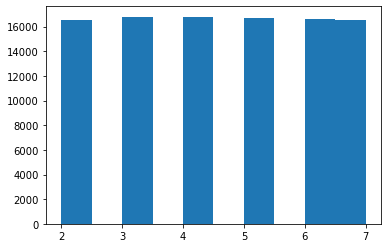

In [5]:
# show the histogram of the return of 100,000 integers from 2 to 7
plt.hist(rng.integers(low=2, high=8, size=100000))
plt.show()

You can see that they are even across

### `random()`

If given no parameters it produces a random float with a possible range of 0 and up to but not including 1[3].

In [6]:
# return a random float with a possible range of 0 and up to but not including 1
rng.random()

0.5701516346294822

Parameters of the function:

* `size`
* `dtype`
* `out`

We can change this by using `size` to determine the shape which can be multi-dimensional.

In [7]:
# return a list of random floats with a possible range of 0 and up to but not including 1
rng.random(size = 5)

array([0.92082749, 0.15286491, 0.385231  , 0.74221668, 0.53174824])

In [8]:
# return a 5 by 2 matrix of random floats with a possible range of 0 and up to but not including 1
rng.random(size = (5,2))

array([[0.92212504, 0.18063844],
       [0.92455563, 0.35229055],
       [0.89023503, 0.52209837],
       [0.869438  , 0.22109309],
       [0.9964938 , 0.39020148]])

`dtype` again like `integers()` above allows you to set the type of the return. This time `random.random()` can only support float64 and float32 (its default is float64). 

In [9]:
# return the same as above but with data type np.float32 
rng.random(size = (5,2), dtype = np.float32)

array([[0.7603892 , 0.93171966],
       [0.8519212 , 0.46400273],
       [0.92794037, 0.59494185],
       [0.17654216, 0.63340247],
       [0.9589981 , 0.33151615]], dtype=float32)

`out` allows you to replace the elements in an array (of the same size as `size`):

In [10]:
# Fill an existing array with random floats with a possible range of 0 and up to but not including 1
# note: the "size" must be the me size as the "out" array
ndarray = np.array([5.0, 4.0, 3.0, 2.0, 1.0])
rng.random(size = 5, out= ndarray)
ndarray

array([0.91313552, 0.58504308, 0.81752573, 0.62743692, 0.40173024])

### `choice()`

Parameters of the function:

* `a`
* `replace`
* `p`
* `axis`
* `shuffle`

Lets say you want to simulate an event with equal likelihood (equal probability). Like rolling a die. If I set `a` to 7 it can simulate a fair roll (it uses np.arange(a) so it will noy include 7).

In [11]:
# create an array of 0 to 6 (to simulate a dice roll)
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [12]:
# choose a random number from that selection
rng.choice(a = 7)

2

You can also give it an ndarray it will choose from that array. If you keep unning the below cell you cannot get an output outside 2, 4, 6, 8, and 10.

In [13]:
# choose a random number from the list
rng.choice(a = [2, 4, 6, 8, 10])

2

`size` will allow you make multiple choices from `a`.

In [14]:
# choose 3 random numbers from the list
rng.choice(a = [2, 4, 6, 8, 10], size = 3)

array([6, 2, 6])

In [15]:
# make a 5 by 5 matrix of random choices from the selection
rng.choice(a = [2, 4, 6, 8, 10], size = (3, 5))

array([[ 8,  6,  6,  8,  4],
       [ 4,  2, 10, 10,  4],
       [ 6,  6,  6,  4,  8]])

`p` then allows you to set the probability of each element of `a`. For example we'll give 6 a probability of 0.6 and the rest 0.1. This means that when the function makes the decision it is 6 times more likely to be 6 then the other number (note: the sum of p must equal 1).

In [16]:
# change probability of each choice being chosen
arr = rng.choice(a = [2, 4, 6, 8, 10], size = 50, p = [0.1, 0.1, 0.6, 0.1, 0.1])
arr

array([ 8,  6,  6,  6,  6,  6,  4,  6,  6,  6,  6,  4,  6,  6,  6,  6, 10,
        2,  4,  6,  6,  6,  6,  6,  6, 10,  6,  4,  6,  6,  6,  6,  6,  8,
        6,  6,  6, 10,  6, 10, 10,  6,  8,  6,  6, 10,  6,  4,  6,  6])

You can see below that 6 has far more then the rest what happens if we get a percentage of each value with respect to the size of the sample?

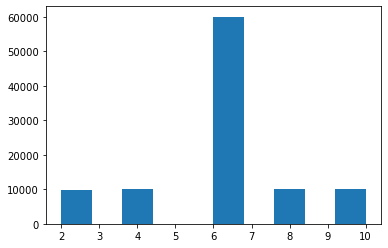

In [17]:
# create a hist showing the number of choices of each number with augments probability
arr2 = rng.choice(a = [2, 4, 6, 8, 10], size = 100000, p = [0.1, 0.1, 0.6, 0.1, 0.1])
plt.hist(arr2)
plt.show()

In [18]:
# Create a function to calculate the percentage of each number in the output of 10000
vals = [2, 4, 6, 8, 10]
percents = []

for i in range(len(vals)):
    count = 0
    for j in range(len(arr2)):
        if arr2[j] == vals[i]:
            count = count + 1
    percents.append(count/100000 * 100)

for x in range(len(vals)):
    print(f"The percentage {vals[x]} was chosen is {percents[x]:.2f} %")

The percentage 2 was chosen is 9.84 %
The percentage 4 was chosen is 10.06 %
The percentage 6 was chosen is 60.09 %
The percentage 8 was chosen is 10.03 %
The percentage 10 was chosen is 9.97 %


You can see that 6 was very close to 60% which is what we set it to above. The reason for this little discrepency is that real world data will not be exact and this package was designed to simulate real world data.

`axis` allows you choose from the within an array or across arrays. In other words you can choose across rows or columns. The default, 0, selects by row [4].

In [19]:
# choose across axis = 0 randomly chooses a column
arr3 = np.array([[1.1, 1.2, 1.3, 1.4],
               [2.1, 2.2, 2.3, 2.4],
               [3.1, 3.2, 3.3, 3.4],
               [4.1, 4.2, 4.3, 4.4]])

rng.choice(a = arr3, size = 4, axis = 0)

array([[1.1, 1.2, 1.3, 1.4],
       [4.1, 4.2, 4.3, 4.4],
       [1.1, 1.2, 1.3, 1.4],
       [1.1, 1.2, 1.3, 1.4]])

In [20]:
# choose across axis = 1 randomly chooses a row
rng.choice(a = arr3, size = 4, axis = 1)

array([[1.3, 1.1, 1.3, 1.3],
       [2.3, 2.1, 2.3, 2.3],
       [3.3, 3.1, 3.3, 3.3],
       [4.3, 4.1, 4.3, 4.3]])

### `bytes()`

Returns a random number of bytes of length `length`.

In [21]:
# create a random selection of 10 bytes
rng.bytes(10)

b'\xefSk<\x9c\xc8\xe0\x8c\xe4\xdb'

***

## Permutations

Permutations are ways to order (or more accurately to remove order from) your data in an array. NumPy has two in its arsenal: `shuffle` and `permutation`. shuffle(x) can permute the elements in x randomly along the first axis. numpy. random. permutation(x) actually returns a new variable and the original data is not changed[5].

### `shuffle()`

Parameters of the function:

* `x`
* `axis`

We'll start with `shuffle`. Lets say you have an array (or list) of numbers but you want them to be in random order then you can apply `shuffle` to it. Lets say we had an array with numbers from one to ten[6].

In [22]:
# create array of 0 to 10
arr4 = np.arange(11)
arr4

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

to shuffle them we set the array to `x` in `shuffle`:

In [23]:
# shuffle the array
rng.shuffle(x = arr4)
arr4

array([10,  0,  3,  7,  9,  8,  5,  6,  1,  2,  4])

If you want to shuffle the arrays around inside an array we can choose the `axis`. First we'll build our multidimensional array.

In [24]:
# create 3 by 3 matrix
arr5 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

Then we'll shuffle it with 0 (the default)

In [25]:
# shuffle across axis = 0 randomly chooses a column
rng.shuffle(x = arr5, axis = 0)
arr5

array([[7, 8, 9],
       [1, 2, 3],
       [4, 5, 6]])

Then with 1:

In [26]:
# shuffle across axis = 1 randomly chooses a row
rng.shuffle(x = arr5, axis = 1)
arr5

array([[8, 9, 7],
       [2, 3, 1],
       [5, 6, 4]])

### `permutation()`

Parameters of the function:

* `x`
* `axis`

`x` can either be an integer or an array (or list). If an integer is used np.arange(x) is used as `x`. 

In [27]:
arr6 = rng.permutation(x = 6)
arr6

array([5, 1, 4, 2, 3, 0])

Like `shuffle` (see above) you can preform `permutation` on a multi dimensional array with `axis` (again 0 is the default).

In [28]:
arr7 = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])

In [29]:
rng.permutation(arr7, axis = 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12],
       [ 5,  6,  7,  8]])

In [30]:
rng.permutation(arr7, axis = 1)

array([[ 3,  4,  2,  1],
       [ 7,  8,  6,  5],
       [11, 12, 10,  9]])

***

## Distributions

Certain data sets taken from the real world follow certain rules to a certain extent.

### `binomial()`

There are pre-requites that a binomial distribution must have:
1. There are only two potential outcomes per trial.
2. The probability of success (p) is the same across all trials.
3. The number of trials (n) is fixed.
4. Each trial is independent.

Lets take an example [7]. Lets say we have a class of 14 students and each student has the probability of 0.6 for passing the class. Well there are two possible outcomes: pass or fail. So that's pre-requite number 1 out of the way. The probability of each student passing is the same, the number of students is the same throughout and whether or not a student passes does not rely on the others passing or failing (unless they cheat but we'll assume we've honest students in our school). So we have an example that covers the criteria for a binomial distribution.

"But Seán.." I hear you say "what good is this information if we don't know how to use it?" Great inquisitve question! Lets get stuck in. Here is the formula to calculate all the possible outcomes of a binomial distribution [8]:

$$ P(X = x) = \binom{n}{x}p^{x}(1-p)^{n-x} $$

This can be read as: The probability that x amount of trails are successful

$$ P(X = x) $$

is equal to the the number of ways you can have x number of successes out of n trials

$$ = \binom{n}{x} $$

Note (we will need this for our calculation below): 

$$ \binom{n}{x} = \frac{n!}{(n-x)!x!} $$

multiplied by the probability of success (p) to the power of the number of successes (x)

$$ p^{x} $$

muliplies by the probability of failure (1-p) to the power of the number of failures (n-x)

$$ (1-p)^{n-x} $$

So in our example above the number of "trials" (n) are the tests our students take so 14 (because there are 14 students). The probability of success (p) for each student is given as 0.6. Lastly we need to choose our x, the number of successful trials we want the probability of we'll see how what it is for the case if half our students pass so x is 7. We can now use the formula to find the probability:

In [31]:
# Set x, n and p
x = 7
n = 14
p = 0.6
# combination formula
com = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))
# probability function for binomial distribution
P = com*(p**x)*((1-p)**(n-x))

In [32]:
P

0.15740769927168002

This is the probability of number of trial successes but what we are looking for is a distribution. This distribution shows the probability for each possible outcome (i.e. from the probability of one successful trial to them all being successful). By turning our code above into a loop we can output this full distribution.

In [33]:
# set n and p
n, p = 14, 0.6
# create probability distribution function that outputs the probability distribution
def binomialProbabilities(n, p):
    probDistribution = []
    for x in range(0, n+1):
        # the above formula in python code
        com = math.factorial(n)/(math.factorial(n-x)*math.factorial(x))
        P = com*(p**x)*((1-p)**(n-x))
        probDistribution.append(P)
        
    return probDistribution

binomialProbabilities(n, p)

[2.684354560000002e-06,
 5.637144576000004e-05,
 0.0005496215961600003,
 0.0032977295769600016,
 0.013603134504960007,
 0.040809403514880015,
 0.09182115790848003,
 0.15740769927168002,
 0.20659760529408,
 0.20659760529408,
 0.15494820397055997,
 0.08451720216575999,
 0.03169395081215999,
 0.007313988648959996,
 0.0007836416409599996]

The parameters of numpys `binomial()` function are the number of experiments `size`, the numbers of trials `n` in each experiment and the probability of success `p`. What the function does is uses the above probability formula to produce numbers that match the probability distribution. So lets say you ran the `binomial` function with the `n` and `p` above 100,000 times. This will produce an array with simulated data of the number of successful trials for each of the 100,000 experiments.

In theory if we were to view the distribution of our experiments and the distribution of the probability they should look similar.

<function matplotlib.pyplot.show(*args, **kw)>

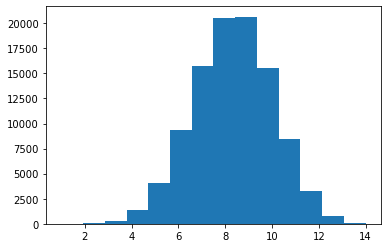

In [34]:
# create histogram showing distribution of the binomial function
number_of_successes = rng.binomial(14, 0.6, 100000)

plt.hist(number_of_successes, 14)
plt.show

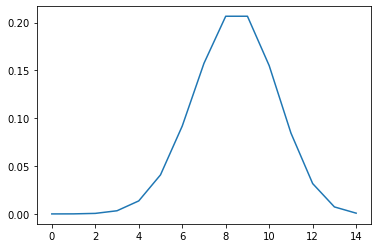

In [35]:
# create plot showing distribution of the binomial probability
probabilities = binomialProbabilities(14, 0.6)
plt.plot(np.arange(15) ,probabilities)

And what do you know! It does.

### `poisson()`

The poisson distribution is discrete which means it can only contain a discrete set of values. The distribution describes the number of events occurring in a fixed time interval or region of opportunity. For example how many customers a shop gets every hour. In this example there is a fixed time interval of an hour and this distribution might discribe the number of events in that hour.[9]

This distribution requires only one parameter, $ \lambda $ (the poisson distribution), which is the expected number of events per time interval. This can also be looked as the mean number of events per time interval. It is also bounded by zero and infinety, [0, $ \infty $),

Assumptions:
1. The rate at which events occur is constant (i.e. that in a given time interval the probability of an event happening should be the exact same as every other time interval of that size).
2. The occurrence of one event does not affect the occurrence of a subsequent event (i.e. events are independent).

The probability mass function is the formula used to determine the probability that a certain number of events ($ x $) will happen in a time interval with the poisson distribution ($ \lambda $). It is give as:

$$ P(X=x) = \frac{e^{-\lambda} \lambda^x}{x!} $$

So given our shop example if we wanted to find the probability of a shop getting 5 customers when the shop gets an average of 3 customers per hour (our time interval for this example). Then the Probability can be worked out by plugging in our values:

$$ P(X=5) = \frac{e^{-3} 3^5}{5!} $$

Which can worked out as:

$$ P(X=x) = 0.101 $$

We can also work it out with Python.

In [36]:
# set lambda and x
lam = 3
x = 5

# the above formula in python code
poissonP = (math.exp(-lam)*(lam**x))/(math.factorial(x))
poissonP

0.10081881344492448

Like above we are looking for a distribution. By looping over the equation above we can find the probability for each possible outcome

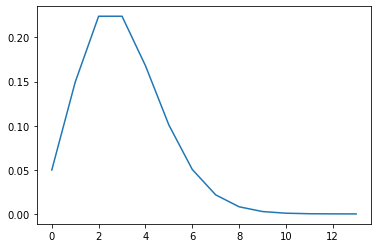

In [37]:
# set lambda
lam = 3
# create probability distribution function that outputs the probability distribution
def poissonProbability(lam):
    probDistribution = []
    poissonP = 0
    for x in range(14):
        # the above formula in python code
        poissonP = math.exp(-lam)*(lam**x)/math.factorial(x)
        probDistribution.append(poissonP)
        
    return probDistribution

# create plot shoing distribution of the binomial probability
plt.plot(poissonProbability(lam))

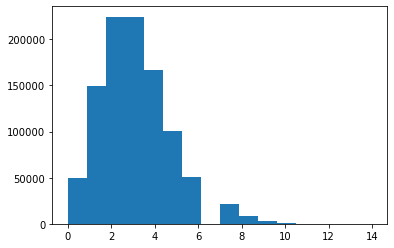

In [38]:
# create histogram showing distribution of the poisson function
plt.hist(rng.poisson(lam,1000000),16)
plt.show()

We can see from the first graph that the probability of getting 3 customers per hour is above a probability of 0.20 and that to either side of that it becomes less and less likely to get the number of customers per hour. The second graph shows the same thing only with actual events. We can see that there are over 200,000 times when 3 customers entered our store.

### `exponential()`

A distribution must have a few requirements to be considered a exponential distribution.

The first being that an exponential distribution is actually the time between events in a Poisson process (i.e. the "inverse" of Poisson, check the previous distribution). 

For example:

| Poisson | Exponential |
|:-:|:-:|
| number of cars passing a tollgate in one hour | Number of hours between arrivals |
|   cars per hour | hours per car |
|   number of customers arriving at a store in a minute | number of minutes between customers arriving |
|   customers per minute | minutes per customers |
| **Events per single unit of time** | **Time per single event (time between events)**|

An exponential distribution must have events that occur at a constant rate and these events must be independent of each other. Meaning that a car passing through a tollgate has no bearing on the time of the next car passing or the number of cars passing in an hour. When it meets these two criteria the exponential distribution can be characterized as memoryless



I'm going to use the shop example from the poisson distribution explaination above. Above we said that our shop had an average of 3 customers per hour, or that our poisson distribution ($ \lambda $) was 3. The distribution for a poisson distribution is classes as "discrete" meaning we can't have 2.5 customers we can either 2 or 3. In an exponential distributon it represents hours until next arrival. This will be represented with a continous curve (because we can have half an hour) which we call a probability density function. The mean for the poisson distribution is $ \lambda $ and no surprise that mean for the exponential distributon is the inverse of this or $ \frac{1}{\lambda} $ otherwise know as $ \mu $[10].

So the mean for an exponential distributon is:

$$ \mu = \frac{1}{\lambda} $$

So in our example we see (on average) 3 customers per hour but we could also say that we see 1 customer every 20 minutes (or $ \frac{1}{3} $ of an hour). For our example we're going to convert to minutes so our mu is 20 minutes ($ \mu = 20 $).

So how do we get the probability that a customer will arrive in the next 10 minutes lets say. Well we can get it by the following formula:

$$ P(X < x) = 1 - e^{\frac{-x}{\mu}} $$

Filling in what we know ( $ \mu = 20 $ and $ x = 10 $) we get:

$$ P(X < 10) = 1 - e^{\frac{-10}{20}} $$

Which means our probability of a customer coming in the next 10 minutes is 0.39346934.

$$ P(X < 10) = 0.39346934 $$

Getting a range and graphing can see the likelihood of someone arriving after a given length of time:

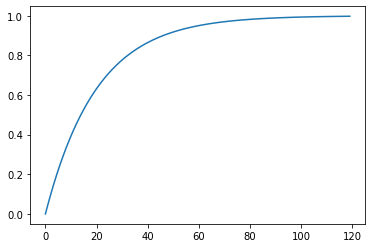

In [39]:
# set mu
mu = 20
likelihood = []
for x in range(120):
    # the above formula in python code
    L = 1 - math.exp(-x/mu)
    likelihood.append(L)
# create plot showing distribution of the exponential probability
plt.plot(likelihood)

The above graph represents the likelihood of a customer entering the shop in a certain time interval. Or the probabilty that someone will walk in in the next x amount of minutes. You'll notice that the longer we wait the more likely it is that someone will arrive. The x-axis is in minutes and we can see that after 60 minutes it becomes rapidly more likely that a customer will enter.

Its probability density function is given with the equation [11]:

$$ P(X < x) = \frac{1}{\mu} e^{\frac{-x}{\mu}} $$

This will show the probability of the next arrival will be in x minutes. We can represent this with Python.

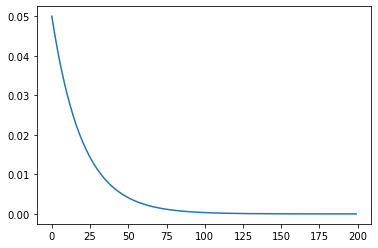

In [40]:
# set mu
mu = 20
# create probability distribution function that outputs the probability distribution
def exponentialProbability(mu):
    probDistribution = []
    for x in range(200):
        # the above formula in python code
        exponentialP = (1/mu)*math.exp(-x/mu)
        probDistribution.append(exponentialP)

    return probDistribution
# create plot showing distribution of the exponential probability
plt.plot(exponentialProbability(mu))

Above you can see that the probability of a time lets say $ x = 25 $ or 25 minutes. We can infer that the probability of someone arriving in the next 25 minutes is just above 0.01.

Similarly if we use the `exponential()` function to create a sample size of 50,000 (`size`) where our $ \mu $ is 20 (`scale` when using the function) we can see a similar shape as above [12]. Showing that there are over 30,000 times a person arrived in about 20 minutes and it continuly gets less the longer the time `x`.

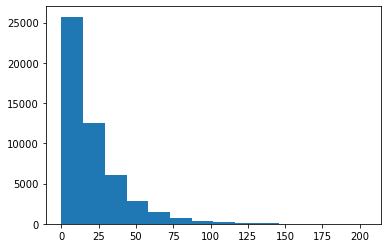

In [41]:
# create hist plot of exponential function
plt.hist(rng.exponential(scale = 20, size = 50000), 14)
plt.show()

### `normal()`

The probability distribution function for a normal distribution is represent by:

$$ P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

The key takeaway here is that there are two parameters mu ($ \mu $) and sigma ($ \sigma $) which are the mean and the standard deviation respectively. These parameters determine the shape (however a normal distribution always looks like a bell shaped shape). The mean is the most likely value of the disttribution (meaning it has the highest probability of occuring) and the standard deviation is 

This distribution can be found in the real world and is explained through the *Central Limit Theorem*. Simply stated this theorm says that "as n increases, the distribution of the sample mean or sum approaches a normal distribution".

So that's all well but what use is this distribution for us? Well because this is such a commonly seen distribution, from rolling a die to blood pressure [13] we can use the `normal()` function to simulate this kind of data. We can give our own mean (or `loc` as our first function parameter), a standard deviation (or `scale` as our second parameter) and what size we want our sample size to be (this parameter is conviently called `size`). Note that the bigger the vale of `size` the more likely you are to have a dataset that truely represents a normal distribution.[14]

Below we set our values for the mean and the standard deviation and place them into our function and the `size` (or number of values to return) to 10,000.

In [42]:
mu, std = 14.5, 0.5 # mean and standard deviation
s = rng.normal(loc = mu, scale = std, size = 10000)

Then we'll create a histogram with 30 ranges.

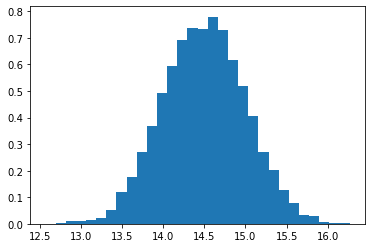

In [43]:
# create hist plot of output of normal function
count, bins, ignored = plt.hist(s, 30, density=True)

Then use the the bins to create the distribution curve. If you look closely you can see that the equation that is used as the second parameter for the plot is the probability distribution function from above. Oh and yellow line is a line straight up from the mean value[15].

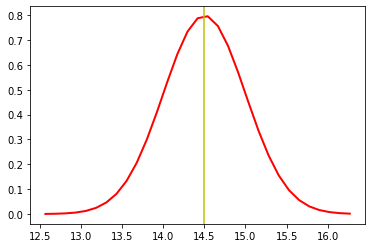

In [44]:
plt.plot(bins, 
         # this is the probability distribution function above
         1/(std * np.sqrt(2 * np.pi))*np.exp( - (bins - mu)**2 / (2 * std**2) ),
         linewidth=2, 
         color='r')

# show the mean line in yellow
plt.axvline(mu, c='y')
plt.show()

This simulated data can be used to represent a wide variety of real world events (or series of events).

### `laplace()`

The probability density function for laplace is[16]:

$$ P(x) = \frac{1}{2\lambda}e^{-\lvert \frac{x-\mu}{\lambda} \rvert} $$

This type of dsitribution is used in Insurance claims and Credit risk in financial engineering . It is also sometimes called the double exponential distribution[17]. We can use the `laplace()` function to simulate this kind of data. We can give our own mean (or `loc` as our first function parameter), a standard deviation (or `scale` as our second parameter) and what size we want our sample size to be (this parameter is conviently called `size`).

Lets first see what the above function produces first for a $ \mu $ of 20 and  $ \lambda $ of 1:

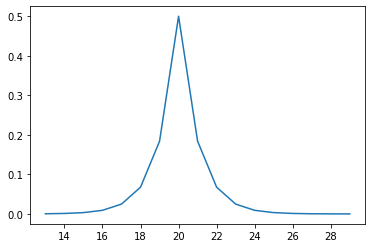

In [45]:
# set mu and lambda
mu , lam = 20, 1
# create function that outputs the probability distribution
def laplaceProbability(mu, lam):
    probDistribution = []
    for x in range(13, 30):
        # the above formula in python code
        laplaceP = (1/2*lam)*math.exp(-(abs((x-mu))/lam))
        probDistribution.append(laplaceP)

    return probDistribution

plt.plot(np.arange(13, 30), laplaceProbability(mu , lam))

Now lets compare this to the output of the `laplace` function. Remember `loc` is $ \mu $ and `scale` is $ \lambda $ and size can be 1 or multi-dimensional:

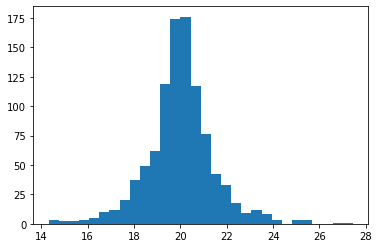

In [46]:
plt.hist(rng.laplace(loc = mu, scale = lam, size = 1000),30)
plt.show()

Here the top graph shows the probabilty distribution. Meaning it shows the likelihood of each value appearing in the distribution. The bottom graph is a graph that displays the output of the `laplace` function. The function returned 1000 numbers (the `size`) and the closer they are to 20 (`loc` or $ \mu $ in our equation) and the severity of the drop on either side is 1 (`scale` or $ \lambda $ in our equation).

***

## Use of seeds in generating pseudorandom numbers

"A random seed (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator." - Wikipedia[18]

Okay? Ya, there is a lot to unpack there. Lets start with what pseudorandom is:

A computer never does something random (unless it's not functioning properly). So it can't generate random numbers, a computer's behavior is entirely predictable, by design[19]. So pseudorandom numbers are "random" numbers generated by computer. To produce these so called "random" numbers (pseudorandom numbers) a computer uses an set of steps (or an algorithm) to produce numbers that seem random.

To produce these seemingly random numbers the the computer must have a starting point. This starting point is known as a seed. The things that use seeds are called a pseudorandom number generator. This generator contains the steps of the algorithm. The output pseudorandom numbers are completely determined by the seed. If the same seed is used twice with the same pseudorandom number generator it will produce the same set of numbers[20].

Remember that the that the pseudorandom number generator is just a set of steps like a function and the seed is our parameter. If you put the same parameter into your function the output will be the same. The way

***
## References

[1] Khan Academy, "Discrete uniform distribution", https://www.youtube.com/watch?v=cyIEhL92wiw&ab_channel=KhanAcademy

[2] NumPy Docs, "numpy.random.Generator.integers", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

[3] NumPy Docs, "numpy.random.Generator.random", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

[4] NumPy Docs, "numpy.random.Generator.choice", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice%5D

[5] Mohanrac, Answer to "shuffle vs permute numpy", https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy#:~:text=shuffle(x)%20can%20permute%20the,original%20data%20is%20not%20changed.

[6] NumPy Docs, "numpy.random.Generator.shuffle", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

[7] mathnstuff.com, "MIDDLE GROUND - Binomial Distribution Examples", http://www.mathnstuff.com/math/spoken/here/2class/90/binom5.htm

[8] zedstatistics, "Binomial Distribution EXPLAINED!", https://www.youtube.com/watch?v=e04_wUoscBU&ab_channel=zedstatistics

[9] zedstatistics, "Poisson Distribution EXPLAINED!", https://www.youtube.com/watch?v=cPOChr_kuQs&ab_channel=zedstatistics

[10] zedstatistics, "Exponential Distribution! Definition | Calculations | Why is it called "Exponential"?", https://www.youtube.com/watch?v=2kg1O0j1J9c&ab_channel=zedstatistics

[11] Wikipedia, "Exponential distribution", https://en.wikipedia.org/wiki/Exponential_distribution

[12] NumPy Docs, "numpy.random.Generator.exponential", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

[13] Jim Frost, "Normal Distribution in Statistics", https://statisticsbyjim.com/basics/normal-distribution/#:~:text=For%20example%2C%20heights%2C%20blood%20pressure,distribution%20and%20the%20bell%20curve.

[14] zedstatistics, "What is a Normal Distribution?", https://www.youtube.com/watch?v=RKdB1d5-OE0&list=PLTNMv857s9WVzutwxaMb0YZKW7hoveGLS&index=6&ab_channel=zedstatistics

[15] NumPy Docs, "numpy.random.Generator.normal", https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#r1536f9c044a3-2

[16] Weisstein, Eric W. "Laplace Distribution." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/LaplaceDistribution.html

[17] wiki.stat.ucla.edu/, "AP Statistics Curriculum 2007 Laplace", http://wiki.stat.ucla.edu/socr/index.php/AP_Statistics_Curriculum_2007_Laplace

[18] Wikipedia, "Random seed", https://en.wikipedia.org/wiki/Random_seed#:~:text=A%20random%20seed%20(or%20seed,not%20need%20to%20be%20random.

[19] computerhope.com, "Pseudorandom", https://www.computerhope.com/jargon/p/pseudo-random.htm

[20] Wikipedia, "Random seed", https://en.wikipedia.org/wiki/Random_seed

***

# End